In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
salary = pd.read_csv("Salary_dataset.csv")

In [4]:
salary.shape

(30, 3)

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
salary.duplicated().sum()

0

In [7]:
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
salary = salary.drop(columns=["Unnamed: 0"])

In [9]:
salary.sample(5)

,YearsExperience,Salary
20,6.9,91739.0
10,4.0,63219.0
29,10.6,121873.0
0,1.2,39344.0
6,3.1,60151.0


In [10]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
salary.corr() # Highly correlated, linear model

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Count'>

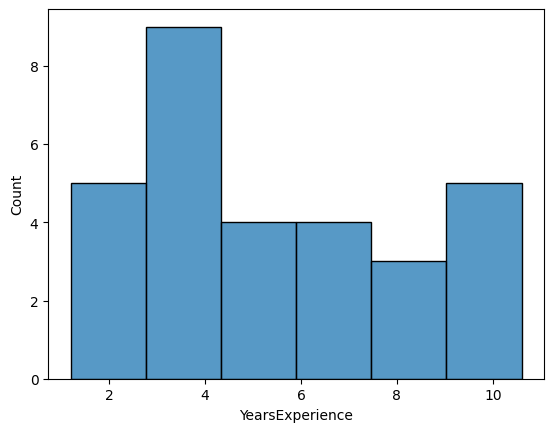

In [12]:
sns.histplot(data=salary, x="YearsExperience")

<Axes: xlabel='Salary', ylabel='Count'>

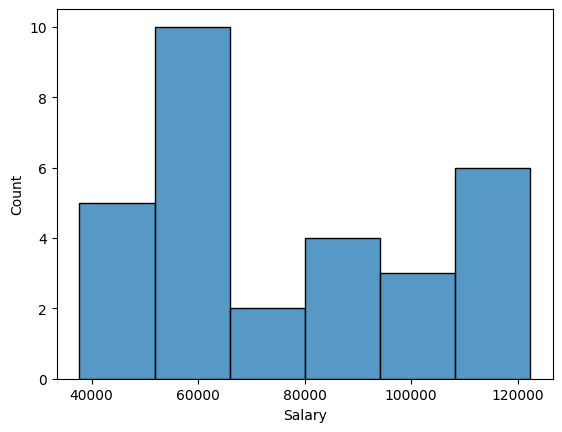

In [13]:
sns.histplot(data=salary, x="Salary")

<Axes: xlabel='YearsExperience', ylabel='Salary'>

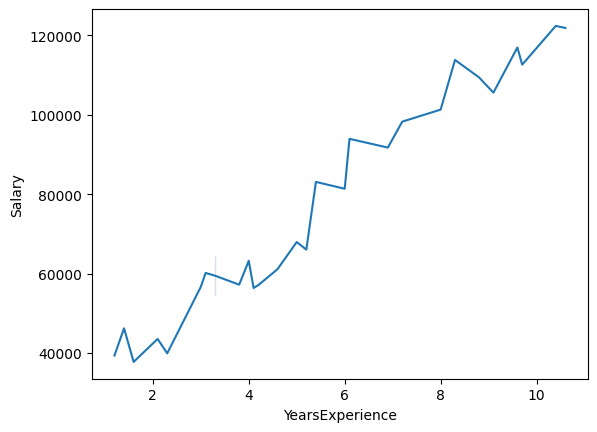

In [ ]:
sns.lineplot(data=salary, x="YearsExperience", y="Salary") 

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [27]:
X = salary[['YearsExperience']]
y = salary['Salary']

In [28]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [29]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [44]:
split_ratios = [(0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]
random_seeds = [0, 42, 99]
dataset_sizes = [0.25, 0.5, 0.75, 1.0]

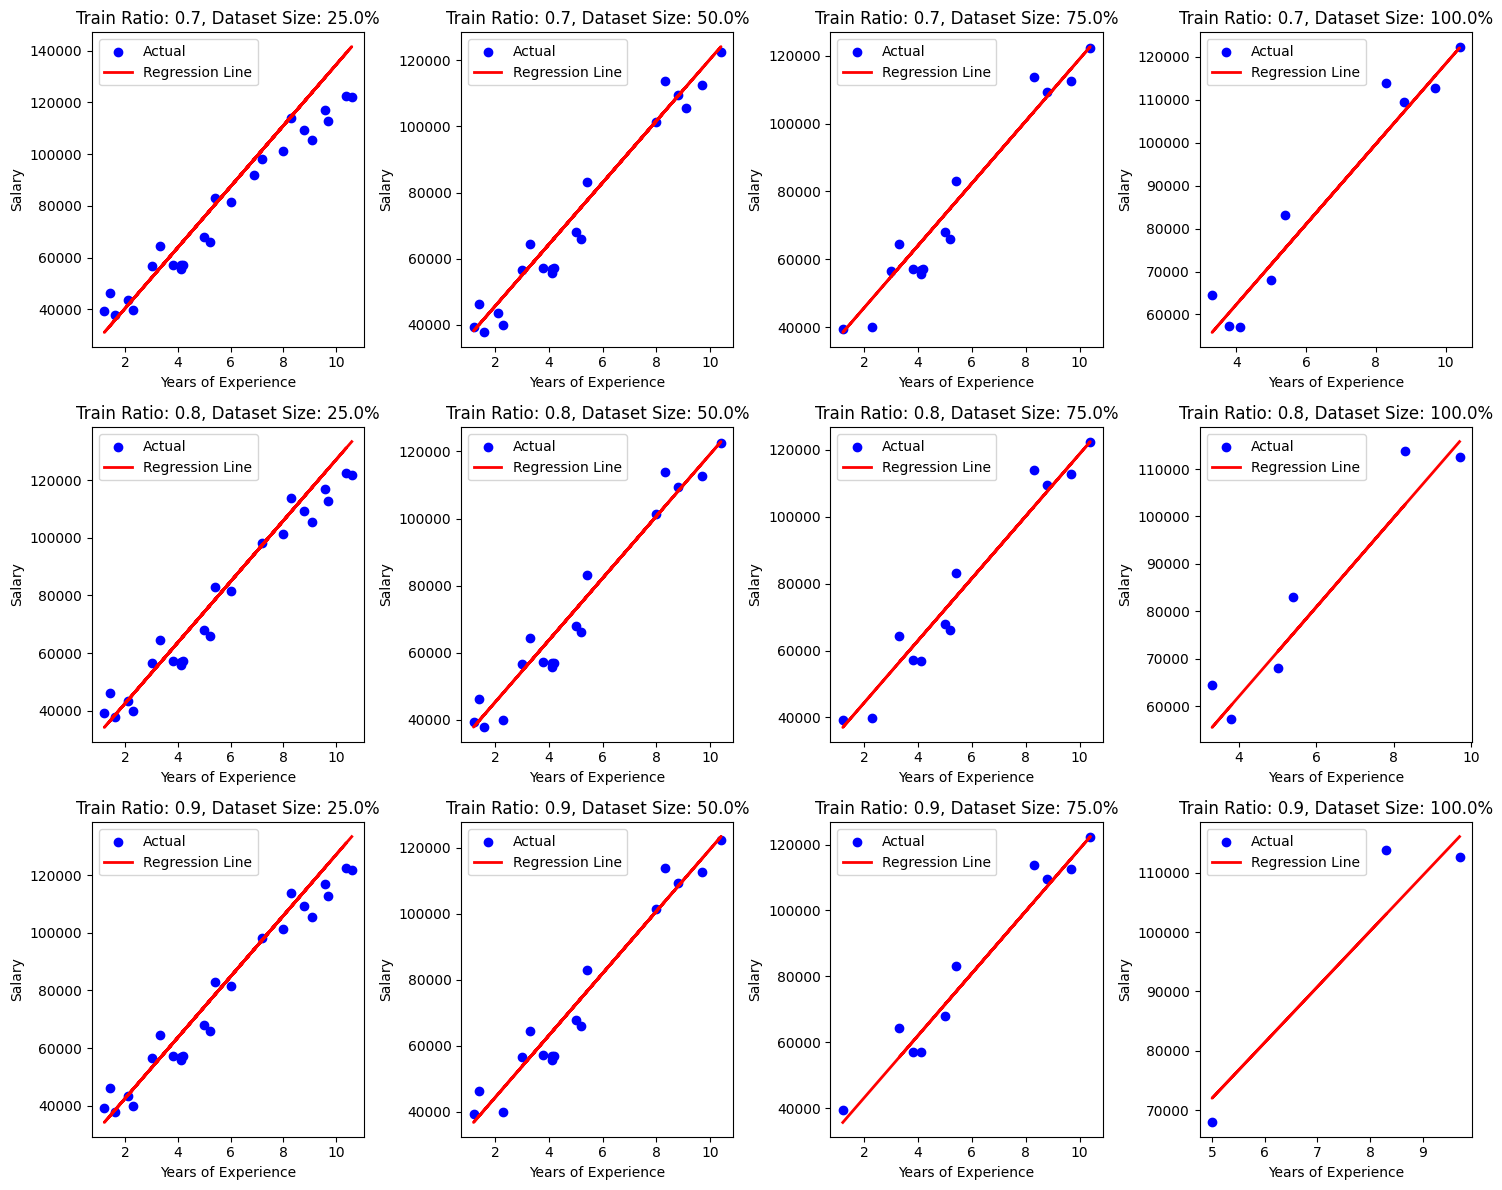

In [45]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(split_ratios), len(dataset_sizes), figsize=(15, 12))

# Iterate over different train-test split ratios
for i, (train_ratio, test_ratio) in enumerate(split_ratios):
    for j, size in enumerate(dataset_sizes):

        # Splitting data with a fixed seed for consistency
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=size * train_ratio, random_state=42
        )

        # Train Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict values
        y_pred = model.predict(X_test)

        # Plot results
        ax = axes[i, j]
        ax.scatter(X_test, y_test, color="blue", label="Actual")
        ax.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
        ax.set_title(f"Train Ratio: {train_ratio}, Dataset Size: {size*100}%")
        ax.set_xlabel("Years of Experience")
        ax.set_ylabel("Salary")
        ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# More the data, better would be the results

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)


0.9414466227178215

In [52]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))